In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
import keras

DATA AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.6)
test_gen=ImageDataGenerator(rescale=(1./255))

In [ ]:
train=train_gen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/train_data/train_data',
                                    target_size=(120,120),
                                    class_mode= 'categorical',
                                    batch_size=8)
test=test_gen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/test_data/test_data',
                                    target_size=(120,120),
                                    class_mode= 'categorical',
                                    batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Convolution2D(40,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=32,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 207s 11s/step - loss: 4.7915 - accuracy: 0.1200 - val_loss: 2.8352 - val_accuracy: 0.1210
Epoch 2/10
19/19 [==============================] - 88s 5s/step - loss: 2.3939 - accuracy: 0.2600 - val_loss: 2.7654 - val_accuracy: 0.1592
Epoch 3/10
19/19 [==============================] - 121s 7s/step - loss: 2.1566 - accuracy: 0.3733 - val_loss: 2.7441 - val_accuracy: 0.2548
Epoch 4/10
19/19 [==============================] - 88s 5s/step - loss: 1.8466 - accuracy: 0.4600 - val_loss: 3.0225 - val_accuracy: 0.2166
Epoch 5/10
19/19 [==============================] - 88s 5s/step - loss: 1.7300 - accuracy: 0.4733 - val_loss: 2.8435 - val_accuracy: 0.1656
Epoch 6/10
19/19 [==============================] - 90s 5s/step - loss: 1.4554 - accuracy: 0.5667 - val_loss: 2.7964 - val_accuracy: 0.1911
Epoch 7/10
19/19 [==============================] - 91s 5s/step - loss: 1.2086 - accuracy: 0.6200 - val_loss: 2.8252 - val_accuracy: 0.1847
Epoch 8/10
19/19 

In [ ]:
model.save('BirdsspeciesWeights.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img1=image.load_img('/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/Images to be tested/jglowl.jpg',target_size=(120,120))

In [ ]:
img1=image.img_to_array(img1)
img1=np.expand_dims(img1,axis=0)
pred=np.argmax(model.predict(img1))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 175ms/step
hsparo


In [ ]:
img=image.load_img('/content/drive/My Drive/Colab Notebooks/SmartBridgeAI/birds-species-classification/Images to be tested/Blasti.jpg',target_size=(120,120))

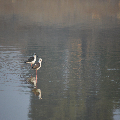

In [ ]:
img

In [ ]:
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
pred=np.argmax(model.predict(img))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
brhkyt


Model is not accurate thats why its giving cmnmyn even though we given Blasti bird species


Model Tuning(Adding feature extraction layers)

In [ ]:
model=Sequential()
model.add(Convolution2D(48,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(96,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(136,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(92,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 118, 48)      1344      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 48)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 57, 96)        41568     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 136)       117640    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 136)     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=32,validation_data=test,epochs=6)

Epoch 1/6
19/19 [==============================] - 95s 5s/step - loss: 2.7694 - accuracy: 0.0867 - val_loss: 2.7400 - val_accuracy: 0.0892
Epoch 2/6
19/19 [==============================] - 90s 5s/step - loss: 2.6871 - accuracy: 0.1400 - val_loss: 2.7169 - val_accuracy: 0.1401
Epoch 3/6
19/19 [==============================] - 89s 5s/step - loss: 2.5409 - accuracy: 0.1933 - val_loss: 2.7980 - val_accuracy: 0.2166
Epoch 4/6
19/19 [==============================] - 89s 5s/step - loss: 2.3827 - accuracy: 0.2333 - val_loss: 2.7628 - val_accuracy: 0.1783
Epoch 5/6
19/19 [==============================] - 91s 5s/step - loss: 2.3077 - accuracy: 0.2867 - val_loss: 2.6988 - val_accuracy: 0.1911
Epoch 6/6
19/19 [==============================] - 90s 5s/step - loss: 2.1469 - accuracy: 0.3200 - val_loss: 2.9813 - val_accuracy: 0.1847


In [ ]:
# img4=image.img_to_array(img4)
# img4=np.expand_dims(img4,axis=0)
pred=np.argmax(model.predict(img))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 213ms/step
cbrtsh


In [ ]:
# img4=image.img_to_array(img4)
# img4=np.expand_dims(img4,axis=0)
pred=np.argmax(model.predict(img1))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 29ms/step
rebimg


Model Tuning(with dropout,normalization &early stoping)

In [ ]:
from tensorflow.keras.layers import BatchNormalization,Dropout

In [ ]:
model=Sequential()
model.add(Convolution2D(48,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Convolution2D(96,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Convolution2D(136,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(92,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 118, 118, 48)      1344      
                                                                 
 batch_normalization (BatchN  (None, 118, 118, 48)     192       
 ormalization)                                                   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 59, 59, 48)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 59, 59, 48)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 57, 57, 96)        41568     
                                                                 
 batch_normalization_1 (Batc  (None, 57, 57, 96)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop=EarlyStopping(monitor='val_accuracy',patience=4)

In [ ]:
model.fit(train,batch_size=32,validation_data=test,epochs=25,callbacks=earlystop)

Epoch 1/25
19/19 [==============================] - 96s 5s/step - loss: 2.6542 - accuracy: 0.1733 - val_loss: 2.8259 - val_accuracy: 0.0064
Epoch 2/25
19/19 [==============================] - 90s 5s/step - loss: 2.4667 - accuracy: 0.2800 - val_loss: 2.8891 - val_accuracy: 0.0573
Epoch 3/25
19/19 [==============================] - 121s 7s/step - loss: 2.2840 - accuracy: 0.2933 - val_loss: 2.9808 - val_accuracy: 0.0573
Epoch 4/25
19/19 [==============================] - 121s 7s/step - loss: 2.0925 - accuracy: 0.3667 - val_loss: 2.9695 - val_accuracy: 0.0701
Epoch 5/25
19/19 [==============================] - 89s 5s/step - loss: 1.9892 - accuracy: 0.4533 - val_loss: 3.0708 - val_accuracy: 0.0637
Epoch 6/25
19/19 [==============================] - 88s 5s/step - loss: 1.8373 - accuracy: 0.4600 - val_loss: 3.1915 - val_accuracy: 0.0573
Epoch 7/25
19/19 [==============================] - 120s 7s/step - loss: 1.8444 - accuracy: 0.4400 - val_loss: 3.0260 - val_accuracy: 0.1146
Epoch 8/25
19/19 

In [ ]:
pred=np.argmax(model.predict(img))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 146ms/step
rebimg


In [ ]:
# img1=image.img_to_array(img1)
# img1=np.expand_dims(img1,axis=0)
pred=np.argmax(model.predict(img1))
output=['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
rebimg
